# Tutorial 1 : PyTorch for Deep Neural Networks

## Follow instructions given in the [PyTorch](http://pytorch.org/) website

### A subtle introduction to PyTorch and its power.

In [1]:
# Importing the library
import torch

In [2]:
# Defining tensors
x = torch.tensor((2,2)) # Initialized with specific values
y = torch.rand(2,2) # Random initialization
print(x,y)

# Obtaining size of tensors
print(y.size())

tensor([2, 2]) tensor([[0.6503, 0.4969],
        [0.0933, 0.0521]])
torch.Size([2, 2])


In [3]:
# Arithmetic operations
z = torch.rand(2,2)
print(y,z,y+z)
print(z,2*z)

tensor([[0.6503, 0.4969],
        [0.0933, 0.0521]]) tensor([[0.9030, 0.5753],
        [0.6100, 0.4583]]) tensor([[1.5533, 1.0722],
        [0.7033, 0.5103]])
tensor([[0.9030, 0.5753],
        [0.6100, 0.4583]]) tensor([[1.8059, 1.1507],
        [1.2200, 0.9165]])


In [4]:
# Indexing is similar to numpy indexing
print(y)
print(y[1,1])
print(y[:,0])

tensor([[0.6503, 0.4969],
        [0.0933, 0.0521]])
tensor(0.0521)
tensor([0.6503, 0.0933])


In [5]:
# Converting to numpy
y_np = y.numpy()
print(type(y))
print(type(y_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [6]:
import numpy as np
# Converting from numpy to tensor
x_np = np.ones((3,3))
x_py = torch.from_numpy(x_np)
print(x_np,x_py)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [7]:
# Improving computational time with GPU acceleration
import time
use_gpu = torch.cuda.is_available()
x = torch.randn(1000,1000)
if use_gpu:
    cpuStart = time.time()
    y = x*x
    cpuEnd = time.time()-cpuStart
    x = x.cuda()
    gpuStart = time.time()
    y = x*x
    gpuEnd = time.time()-gpuStart
    print('CPU computation completed in {:.6f}s, GPU computation completed in {:.6f}s'\
          .format(cpuEnd,gpuEnd))    
    

CPU computation completed in 0.001812s, GPU computation completed in 0.000359s


### Autograd
 This package provides automatic differentiation for all operations on Tensors

In [8]:
from torch.autograd import Variable
a = torch.ones(2,2)
a_var = Variable(a,requires_grad=True)
print(a)
print(a_var)

tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [9]:
b = a_var+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [10]:
print(b.grad_fn)

In [11]:
c = b*b*3
d = c.mean()
print(c)
print(d)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [12]:
d.backward()

In [13]:
# Gradients
print(a_var.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


### Torchvision datasets

In [14]:
%matplotlib inline
import torch
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [15]:
apply_transform = transforms.Compose([transforms.ToTensor()])
trainDset = datasets.MNIST('./MNIST',train=True, download=True, transform= apply_transform)
testDset = datasets.MNIST('./MNIST',train=False, download=True, transform= apply_transform)

0it [00:00, ?it/s]

 92%|█████████▏| 9117696/9912422 [00:20<00:02, 301892.40it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 43443.90it/s]            
0it [00:00, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz



100%|█████████▉| 1646592/1648877 [00:08<00:00, 239380.50it/s]

0it [00:00, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 16183.60it/s]            

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:39, 301892.40it/s]                             
1654784it [00:27, 239380.50it/s]                             

In [16]:
# Number of samples
print(len(trainDset),len(testDset))

60000 10000


Label: 5


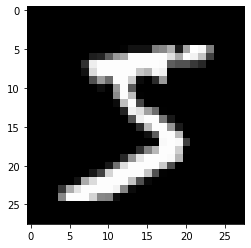

In [17]:
# Displaying sample image from the dataset
img = trainDset[0][0].numpy().transpose(1,2,0).squeeze(2)
plt.imshow(img,'gray')
print('Label: '+str(trainDset[0][1]))

In [18]:
# Creating dataloader for loading data in batches
trainLoader = torch.utils.data.DataLoader(trainDset, batch_size=10, shuffle=True, num_workers=1, pin_memory=False)
testLoader = torch.utils.data.DataLoader(testDset, batch_size=10, shuffle=True, num_workers=1, pin_memory=False)

### Defining a multi-layer perceptron

In [19]:
import torch.nn.functional as F
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28,100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x

In [20]:
net = MLP()
print(net)

MLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [21]:
params = list(net.parameters())
# print('No. of parameters :'+str(len(params)))
print('Dimensions of first layer weights: '+str(params[0].size())) # Weights of fc1
print('Dimensions of first layer bias: '+str(params[1].size())) # Biases of fc1

totalParams = 0
for param in params:    
    print(param.size())
    totalParams += np.sum(np.prod(param.size()))
print('Total number of parameters: '+str(totalParams))

Dimensions of first layer weights: torch.Size([100, 784])
Dimensions of first layer bias: torch.Size([100])
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])
Total number of parameters: 79510


In [22]:
inp = trainLoader.dataset[0][0]
label = trainLoader.dataset[0][1]

In [23]:
from torch.autograd import Variable
# Feed-forward data through network
out = net(Variable(inp.view(-1,28*28)))
print(inp.size())
print(out.size())

torch.Size([1, 28, 28])
torch.Size([1, 10])


In [24]:
# Backpropagating gradients
net.zero_grad()
out.backward(torch.randn(1, 10)) # Using random gradients

In [25]:
out = net(Variable(inp.view(-1,28*28)))
# Defining loss function
criterion = nn.NLLLoss() # Negative log-likelihood loss
label = label*torch.ones(1).long() # Converting to tensor
loss = criterion(out,Variable(label)) # NLLLoss() expects the labels to be of dtype 'long'
print(loss)

tensor(2.6201, grad_fn=<NllLossBackward>)


In [26]:
# Backprogation
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('Bias gradient of fc1 before backward')
print(net.fc1.bias.grad[:10])

loss.backward()

print('Bias gradient of fc1 after backward')
print(net.fc1.bias.grad[:10])

Bias gradient of fc1 before backward
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Bias gradient of fc1 after backward
tensor([ 0.0170,  0.0153, -0.0145,  0.0103, -0.0097, -0.0267,  0.0096,  0.0104,
        -0.0178,  0.0031])


In [27]:
import copy
# Updataing weights of the network
learning_rate = 1
init_params = copy.deepcopy(net.fc2.weight.data) # Copying initial parameters

for f in net.parameters():    
    f.data.sub_(f.grad.data * learning_rate)
updated_params = net.fc2.weight.data
print(init_params[0,:5])
print(updated_params[0,:5])
   

tensor([-0.0594, -0.0594, -0.0978,  0.0709,  0.0500])
tensor([-0.1086, -0.1132, -0.1464,  0.0245,  0.0035])
